# Data Characteristics
Import our data frames and play around to see what characteristics we have in our data

In [11]:
# import processed df from ../data/processed/df_merged_extended_weather.csv
import pandas as pd
df_merged_extended_weather = pd.read_csv("../data/processed/df_merged_extended_weather.csv")
display(df_merged_extended_weather.shape)
df_merged_extended_weather.tail()

(9334, 15)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours
9329,2018-07-31,0,5.0,31.2875,11.0,1807311,1.0,123.075682,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9330,2018-07-31,0,5.0,31.2875,11.0,1807312,2.0,586.081666,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9331,2018-07-31,0,5.0,31.2875,11.0,1807313,3.0,285.872616,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9332,2018-07-31,0,5.0,31.2875,11.0,1807314,4.0,57.102795,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9333,2018-07-31,0,5.0,31.2875,11.0,1807315,5.0,261.341313,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347


In [12]:
import scipy.stats as stats
import seaborn as sns
# Testing Regression
#reg_cols=['Umsatz_umsatz','umsatz_rolling7','KielerWoche_kiwo','Bewoelkung_weather', 'rain_sum', 'sunshine_hours','Temperatur_weather','Windgeschwindigkeit_weather','precipitation_hours','day_of_week']
reg_cols=['Umsatz_umsatz','KielerWoche_kiwo','Bewoelkung_weather', 'rain_sum', 'sunshine_hours','Temperatur_weather','Windgeschwindigkeit_weather','precipitation_hours','day_of_week']
#sns.pairplot(df_merged_extended_weather[reg_cols].dropna())
df_merged_extended_weather[reg_cols].corr()

,Umsatz_umsatz,KielerWoche_kiwo,Bewoelkung_weather,rain_sum,sunshine_hours,Temperatur_weather,Windgeschwindigkeit_weather,precipitation_hours,day_of_week
Umsatz_umsatz,1.000000,0.058244,-0.089410,-0.006203,0.172404,0.222754,0.014656,-0.035543,0.136199
KielerWoche_kiwo,0.058244,1.000000,0.011505,0.023145,0.088911,0.138329,0.020482,0.026237,0.042733
Bewoelkung_weather,-0.089410,0.011505,1.000000,0.272869,-0.650125,-0.391204,0.040599,0.427817,-0.004879
rain_sum,-0.006203,0.023145,0.272869,1.000000,-0.266330,0.029935,0.144634,0.778271,0.012229
sunshine_hours,0.172404,0.088911,-0.650125,-0.266330,1.000000,0.625493,0.075587,-0.376662,-0.017579
Temperatur_weather,0.222754,0.138329,-0.391204,0.029935,0.625493,1.000000,0.004367,-0.113850,0.004351
Windgeschwindigkeit_weather,0.014656,0.020482,0.040599,0.144634,0.075587,0.004367,1.000000,0.191661,-0.005762
precipitation_hours,-0.035543,0.026237,0.427817,0.778271,-0.376662,-0.113850,0.191661,1.000000,-0.007771
day_of_week,0.136199,0.042733,-0.004879,0.012229,-0.017579,0.004351,-0.005762,-0.007771,1.000000


In [13]:
# displaying umsatz correlations
correlations = df_merged_extended_weather[reg_cols].corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

Umsatz_umsatz                  1.000000
Temperatur_weather             0.222754
sunshine_hours                 0.172404
day_of_week                    0.136199
KielerWoche_kiwo               0.058244
Windgeschwindigkeit_weather    0.014656
rain_sum                      -0.006203
precipitation_hours           -0.035543
Bewoelkung_weather            -0.089410
Name: Umsatz_umsatz, dtype: float64


Check on which days we have high sales

day_of_week
6    246.495651
5    241.319882
4    196.796023
0    193.688449
3    193.232274
1    187.944440
2    187.477523
Name: Umsatz_umsatz, dtype: float64


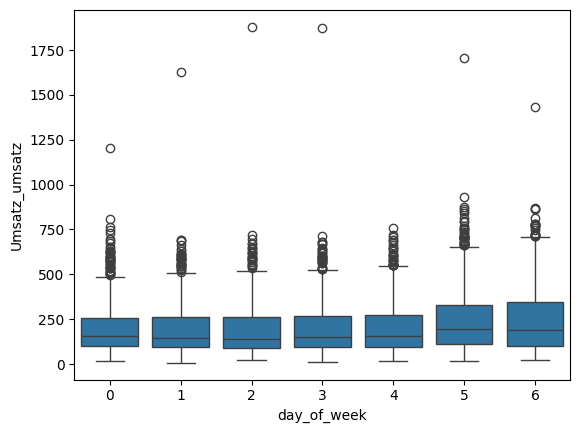

In [14]:
# check on which day of week have high sales
sns.boxplot(x='day_of_week', y='Umsatz_umsatz', data=df_merged_extended_weather)
# Calculate average sales per day of the week
avg_sales_by_day = df_merged_extended_weather.groupby('day_of_week')['Umsatz_umsatz'].mean().sort_values(ascending=False)
print(avg_sales_by_day)

month
8     288.522492
7     271.829358
6     226.627640
9     213.935441
5     211.430539
10    210.002890
4     197.351662
2     185.515356
3     182.284023
12    169.640144
1     167.972552
11    154.596543
Name: Umsatz_umsatz, dtype: float64


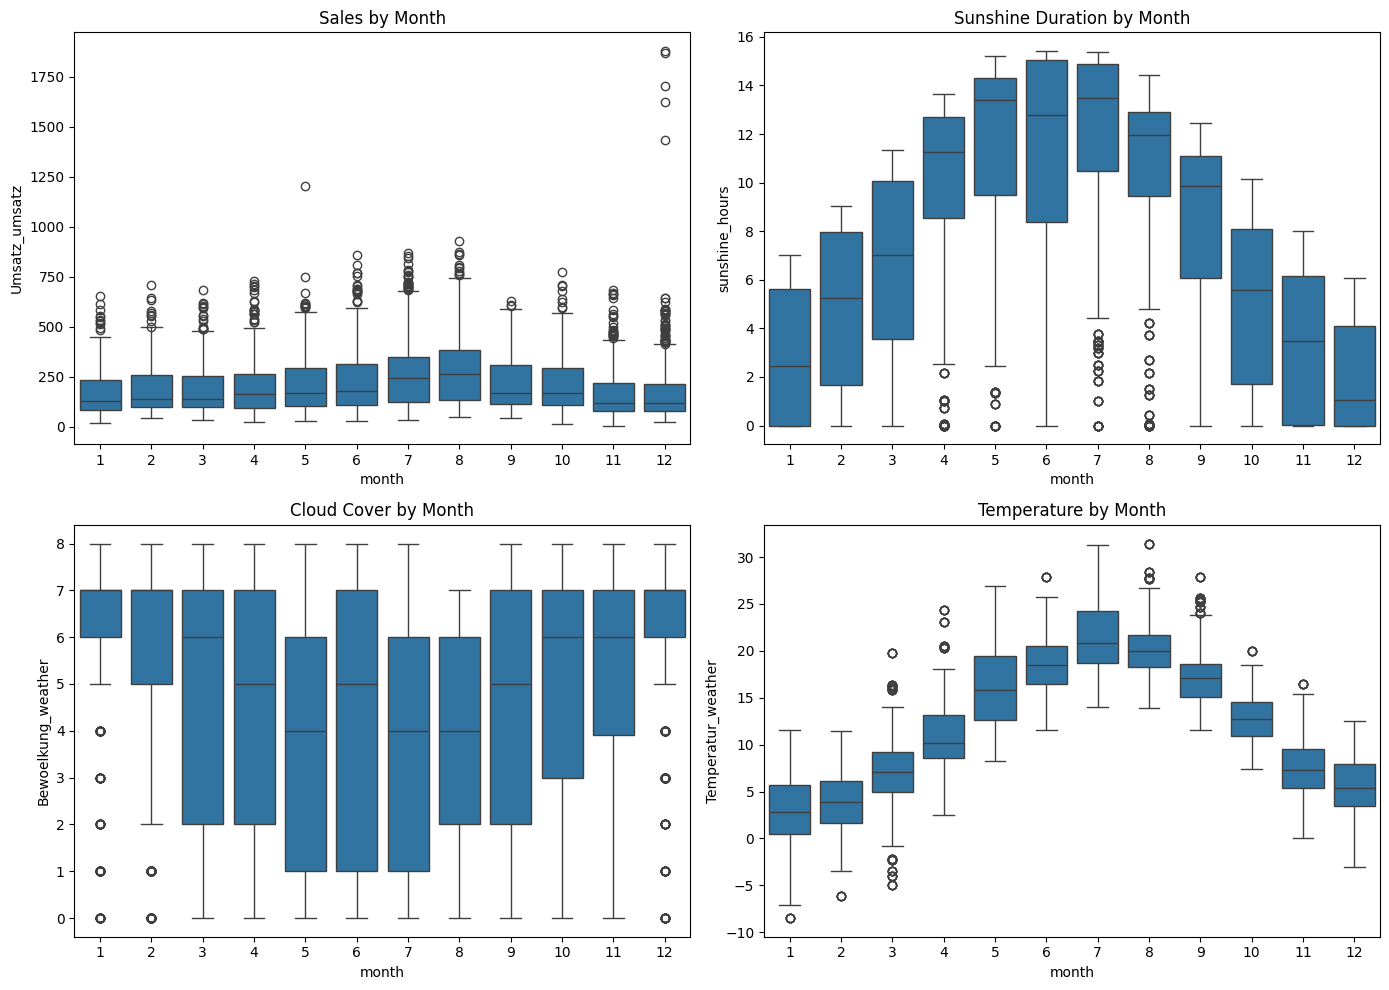

In [15]:
# Extract month from date column (adjust 'Datum' if the column name differs)
df_merged_extended_weather['month'] = pd.to_datetime(df_merged_extended_weather['Datum']).dt.month

# Calculate average sales per month
avg_sales_by_month = df_merged_extended_weather.groupby('month')['Umsatz_umsatz'].mean().sort_values(ascending=False)
print(avg_sales_by_month)

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales by month
sns.boxplot(ax=axes[0, 0], x='month', y='Umsatz_umsatz', data=df_merged_extended_weather)
axes[0, 0].set_title('Sales by Month')

# Sunshine duration by month
sns.boxplot(ax=axes[0, 1], x='month', y='sunshine_hours', data=df_merged_extended_weather)
axes[0, 1].set_title('Sunshine Duration by Month')

# Cloud cover by month
sns.boxplot(ax=axes[1, 0], x='month', y='Bewoelkung_weather', data=df_merged_extended_weather)
axes[1, 0].set_title('Cloud Cover by Month')

sns.boxplot(ax=axes[1, 1], x='month', y='Temperatur_weather', data=df_merged_extended_weather)
axes[1, 1].set_title('Temperature by Month')

plt.tight_layout()
plt.show()

Warengruppe_umsatz
1.0    222177.223458
2.0    732143.699518
3.0    297117.132705
4.0    155326.837913
5.0    503491.030149
6.0     19539.657423
Name: Umsatz_umsatz, dtype: float64


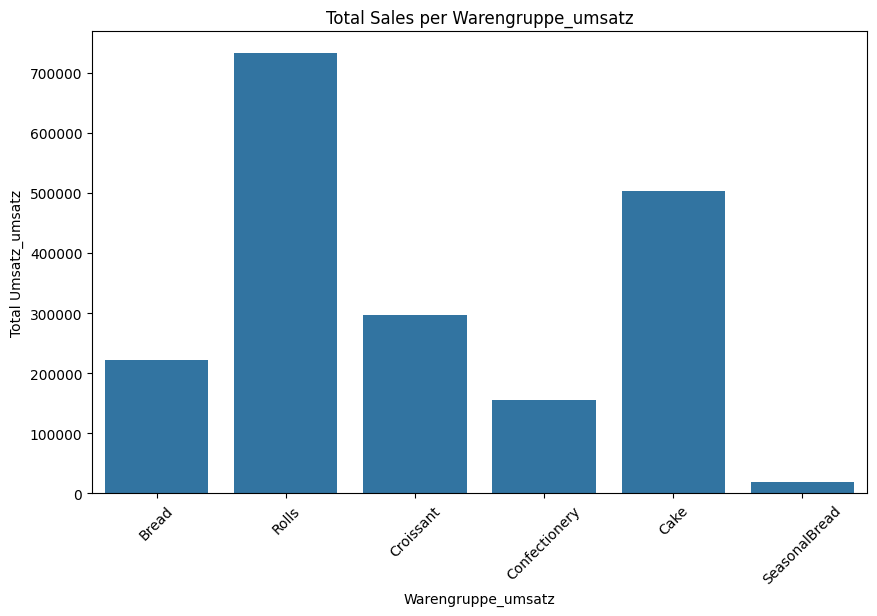

In [16]:
# Calculate total sales per Warengruppe_umsatz
import matplotlib.pyplot as plt
total_sales_by_group = df_merged_extended_weather.groupby('Warengruppe_umsatz')['Umsatz_umsatz'].sum().sort_index()
print(total_sales_by_group)

# Visualize total sales per Warengruppe_umsatz
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_group.index, y=total_sales_by_group.values)
plt.title('Total Sales per Warengruppe_umsatz')
plt.xlabel('Warengruppe_umsatz')
plt.ylabel('Total Umsatz_umsatz')
labels = ['Bread', 'Rolls', 'Croissant', 'Confectionery', 'Cake', 'SeasonalBread']
plt.xticks(ticks=range(len(total_sales_by_group)), labels=labels, rotation=45)
plt.show()

# Check with Holidays

In [17]:
# import processed df from ../data/processed/df_extended_weather_holidays.csv
df_merged_extended_weather = pd.read_csv("../data/processed/df_extended_weather_holidays.csv")
display(df_merged_extended_weather.shape)
df_merged_extended_weather.tail()

(9334, 17)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday
9329,2018-07-31,0,5.0,31.2875,11.0,1807311,1.0,123.075682,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9330,2018-07-31,0,5.0,31.2875,11.0,1807312,2.0,586.081666,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9331,2018-07-31,0,5.0,31.2875,11.0,1807313,3.0,285.872616,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9332,2018-07-31,0,5.0,31.2875,11.0,1807314,4.0,57.102795,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9333,2018-07-31,0,5.0,31.2875,11.0,1807315,5.0,261.341313,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1


In [18]:
# shift -1 for next_day_holiday from public_holiday column
#df_merged_extended_weather['next_day_holiday'] = df_merged_extended_weather['public_holiday'].shift(-1)

#write temp csv only write Datum, public_holiday, next_day_holiday
#df_merged_extended_weather[['Datum', 'public_holiday', 'next_day_holiday']].to_csv("../data/processed/df_extended_weather_holidays_nextdayholiday.csv", index=False)

# check correlation of umsatz with all other columns except Datum
correlations = df_merged_extended_weather.drop(columns=['Datum','day']).corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

Umsatz_umsatz                  1.000000
temperature_2m_mean            0.224834
Temperatur_weather             0.222754
school_holiday                 0.175640
sunshine_duration              0.172404
sunshine_hours                 0.172404
day_of_week                    0.136199
KielerWoche_kiwo               0.058244
public_holiday                 0.043574
Windgeschwindigkeit_weather    0.014656
rain_sum                      -0.006203
precipitation_hours           -0.035543
Warengruppe_umsatz            -0.062589
id_umsatz                     -0.086929
Bewoelkung_weather            -0.089410
Name: Umsatz_umsatz, dtype: float64


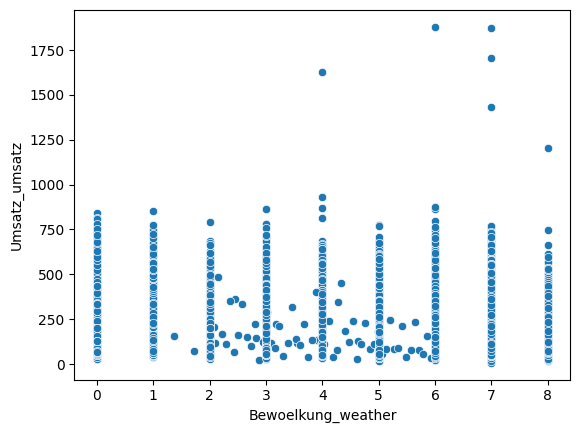

(9334, 17)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday
1026,2014-01-16,0,8.0,2.7375,9.0,1401163,3.0,96.863471,3,Thursday,22.0,0.00,12.0,2.6,0.000000,0,0
3431,2015-05-14,0,7.0,11.2500,10.0,1505142,2.0,490.915769,3,Thursday,0.0,33626.41,0.0,9.9,9.340669,1,0
7605,2017-08-23,0,0.0,19.4375,9.0,1708233,3.0,217.364002,2,Wednesday,4.0,44480.63,0.6,15.1,12.355731,0,1
7501,2017-08-02,0,5.0,21.3750,8.0,1708024,4.0,131.702254,2,Wednesday,3.0,34555.98,3.4,17.3,9.598883,0,1
7461,2017-07-25,0,7.0,16.2500,16.0,1707254,4.0,81.269543,1,Tuesday,17.0,0.00,14.5,16.1,0.000000,0,1


In [19]:

sns.scatterplot(x='Bewoelkung_weather', y='Umsatz_umsatz', data=df_merged_extended_weather)
plt.show()
# dropping columns which have negative correlation with umsatz
# cols_to_drop = correlations[correlations < 0].index.tolist()
# df_final = df_merged_extended_weather.drop(columns=cols_to_drop)
#print(f"Dropped columns: {cols_to_drop}")
df_final = df_merged_extended_weather.copy()
display(df_final.shape)
df_final.sample(5)

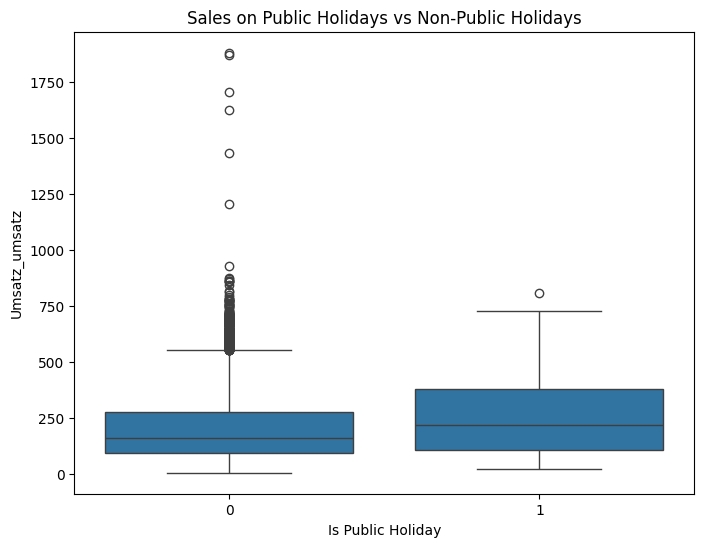

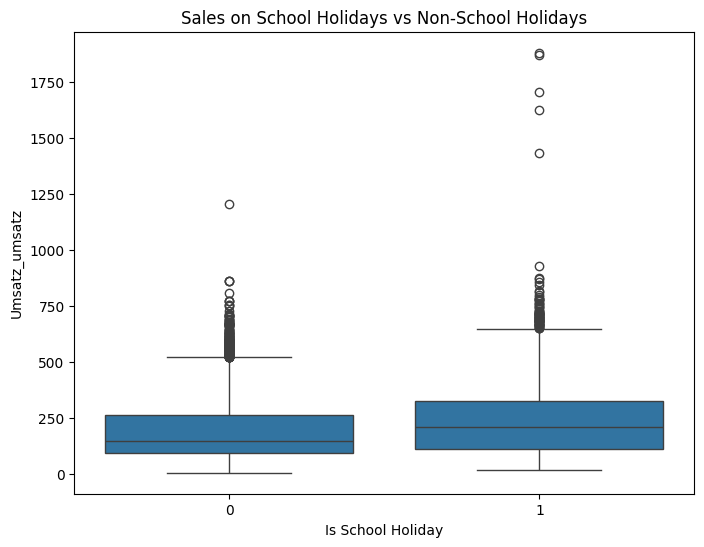

ValueError: Could not interpret value `next_day_holiday` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [20]:
# check if there was effect of public holidays and school holidays on sales
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot for public holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='public_holiday', y='Umsatz_umsatz', data=df_final)
plt.title('Sales on Public Holidays vs Non-Public Holidays')
plt.xlabel('Is Public Holiday')
plt.ylabel('Umsatz_umsatz')
plt.show()
# Boxplot for school holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='school_holiday', y='Umsatz_umsatz',
            data=df_final)
plt.title('Sales on School Holidays vs Non-School Holidays')
plt.xlabel('Is School Holiday')
plt.ylabel('Umsatz_umsatz')
plt.show()
# Boxplot for next day holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='next_day_holiday', y='Umsatz_umsatz',
            data=df_final)
plt.title('Sales on Next Day Holidays vs Non-Next Day Holidays')
plt.xlabel('Is Next Day Holiday')
plt.ylabel('Umsatz_umsatz')
plt.show()


# check their significance using t-test
public_holiday_sales = df_final[df_final['public_holiday'] == 1]['Umsatz_umsatz']
non_public_holiday_sales = df_final[df_final['public_holiday'] == 0]['Umsatz_umsatz']
t_stat, p_value = stats.ttest_ind(public_holiday_sales, non_public_holiday_sales, equal_var=False)
print(f"T-test for Public Holidays: t-statistic = {t_stat}, p-value = {p_value}")   
school_holiday_sales = df_final[df_final['school_holiday'] == 1]['Umsatz_umsatz']
non_school_holiday_sales = df_final[df_final['school_holiday'] == 0]['Umsatz_umsatz']
t_stat, p_value = stats.ttest_ind(school_holiday_sales, non_school_holiday_sales, equal_var=False)
print(f"T-test for School Holidays: t-statistic = {t_stat}, p-value = {p_value}")
#also checking next_day_holiday significance
next_day_holiday_sales = df_final[df_final['next_day_holiday'] == 1]['Umsatz_umsatz']
non_next_day_holiday_sales = df_final[df_final['next_day_holiday'] == 0]['Umsatz_umsatz']
t_stat, p_value = stats.ttest_ind(next_day_holiday_sales, non_next_day_holiday_sales, equal_var=False)
print(f"T-test for Next Day Holidays: t-statistic = {t_stat}, p-value = {p_value}") 
# check 




## Exploring training data cleaned one

In [21]:
import pandas as pd
# import df_train_cleaned.csv from ../data/processed/df_train_cleaned.csv
df_train_clean = pd.read_csv("../data/processed/df_train_data_cleaned.csv")
df_validation_clean = pd.read_csv("../data/processed/df_validation_data_cleaned.csv")

#print shapes
print(f"Train data shape: {df_train_clean.shape}")
print(f"Validation data shape: {df_validation_clean.shape}")

Train data shape: (7487, 17)
Validation data shape: (1841, 18)


In [22]:
# experimenting with extra variables
df_train_clean.head()

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,Warengruppe_umsatz,Umsatz_umsatz,umsatz_rolling7,day_of_week,is_saturday,is_sunday,sunshine_duration,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday,next_day_holiday
0,2013-07-01,0.0,6.0,17.8375,15.0,1.0,148.828353,148.828353,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
1,2013-07-01,0.0,6.0,17.8375,15.0,2.0,535.856285,221.786925,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
2,2013-07-01,0.0,6.0,17.8375,15.0,3.0,201.198426,592.534505,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
3,2013-07-01,0.0,6.0,17.8375,15.0,4.0,65.890169,311.369828,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
4,2013-07-01,0.0,6.0,17.8375,15.0,5.0,317.475875,109.314600,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0


In [23]:

df_train_clean = df_train_clean.sort_values('Datum')

# Compute daily temperature difference
daily_temp = df_train_clean.groupby('Datum')['Temperatur_weather'].first().reset_index()
daily_temp['temp_diff'] = daily_temp['Temperatur_weather'] - daily_temp['Temperatur_weather'].shift(1)

# Merge back to original DataFrame
df_train_clean = df_train_clean.merge(daily_temp[['Datum', 'temp_diff']], on='Datum', how='left')

daily_cloud = df_train_clean.groupby('Datum')['Bewoelkung_weather'].first().reset_index()
daily_cloud['bewoelkung_diff'] = daily_cloud['Bewoelkung_weather'] - daily_cloud['Bewoelkung_weather'].shift(1)

# Merge back to original DataFrame
df_train_clean = df_train_clean.merge(daily_cloud[['Datum', 'bewoelkung_diff']], on='Datum', how='left')


df_train_clean.head()  # Verify

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,Warengruppe_umsatz,Umsatz_umsatz,umsatz_rolling7,day_of_week,is_saturday,is_sunday,sunshine_duration,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday,next_day_holiday,temp_diff,bewoelkung_diff
0,2013-07-01,0.0,6.0,17.8375,15.0,1.0,148.828353,148.828353,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
1,2013-07-01,0.0,6.0,17.8375,15.0,2.0,535.856285,221.786925,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
2,2013-07-01,0.0,6.0,17.8375,15.0,3.0,201.198426,592.534505,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
3,2013-07-01,0.0,6.0,17.8375,15.0,4.0,65.890169,311.369828,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
4,2013-07-01,0.0,6.0,17.8375,15.0,5.0,317.475875,109.314600,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN


In [24]:
#drop non numeric columns for correlation check
df_train_clean_numeric = df_train_clean.select_dtypes(include=['number'])

# Add month column and last day of year column
df_train_clean_numeric['month'] = pd.to_datetime(df_train_clean['Datum']).dt.month
df_train_clean_numeric['is_last_day_of_year'] = pd.to_datetime(df_train_clean['Datum']).dt.is_year_end.astype(int)


#remove sunshine_duration, Umsatz_umsatz,umsatz_rolling7  column if exists
if 'sunshine_duration' in df_train_clean_numeric.columns:
    df_train_clean_numeric = df_train_clean_numeric.drop(columns=['sunshine_duration'])
#if 'Umsatz_umsatz' in df_train_clean_numeric.columns:
#    df_train_clean_numeric = df_train_clean_numeric.drop(columns=['Umsatz_umsatz'])
if 'umsatz_rolling7' in df_train_clean_numeric.columns:
    df_train_clean_numeric = df_train_clean_numeric.drop(columns=['umsatz_rolling7'])  

# check correlation of temp_diff and Temperature_weather with umsatz
correlations = df_train_clean_numeric.corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

Umsatz_umsatz                  1.000000
temperature_2m_mean            0.218570
Temperatur_weather             0.216569
school_holiday                 0.172477
sunshine_hours                 0.167770
is_last_day_of_year            0.139786
day_of_week                    0.134952
is_sunday                      0.109829
is_saturday                    0.097841
next_day_holiday               0.080972
KielerWoche_kiwo               0.053631
public_holiday                 0.047747
month                          0.015748
Windgeschwindigkeit_weather    0.011454
temp_diff                      0.001987
bewoelkung_diff               -0.013652
Warengruppe_umsatz            -0.059875
Bewoelkung_weather            -0.085921
Name: Umsatz_umsatz, dtype: float64


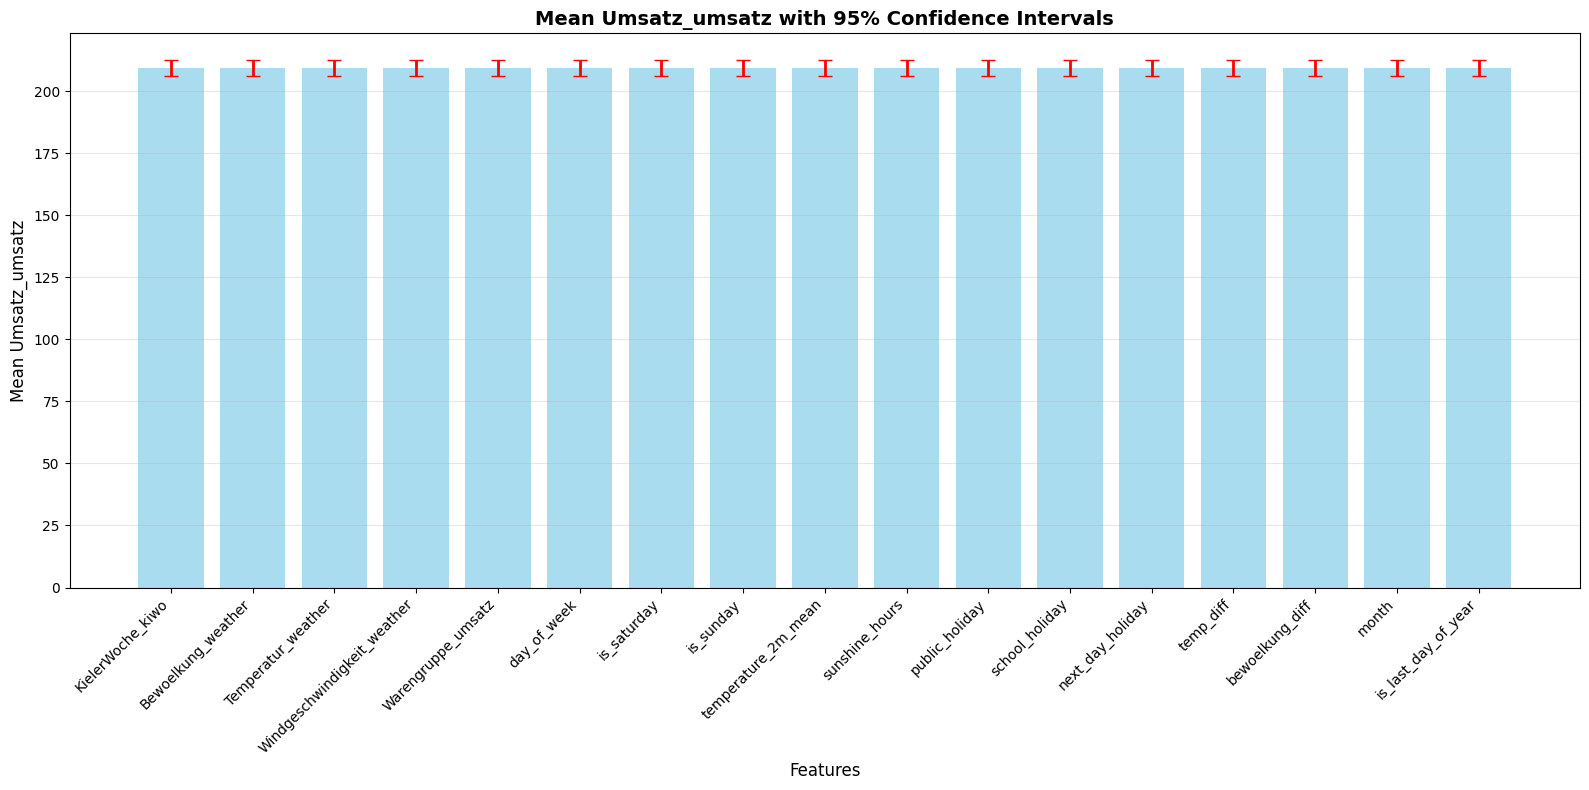


Summary Statistics - Umsatz_umsatz with 95% Confidence Intervals:
--------------------------------------------------------------------------------
KielerWoche_kiwo              : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
Bewoelkung_weather            : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
Temperatur_weather            : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
Windgeschwindigkeit_weather   : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
Warengruppe_umsatz            : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
day_of_week                   : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
is_saturday                   : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
is_sunday                     : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
temperature_2m_mean           : Mean Umsatz =     209.35, CI = [    206.00,     212.70]
sunshine_hours                : Mean Umsatz =     209.35, CI

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get all numeric columns except Umsatz_umsatz itself
numeric_cols = [col for col in df_train_clean_numeric.columns if col != 'Umsatz_umsatz']

# Calculate mean Umsatz_umsatz and 95% confidence interval for each feature grouping
means = []
ci_lower = []
ci_upper = []
labels = []

for col in numeric_cols:
    # For each unique value of the feature, calculate mean Umsatz
    grouped = df_train_clean_numeric.groupby(col)['Umsatz_umsatz'].apply(list)
    
    # Calculate overall mean and CI for Umsatz when grouped by this feature
    data = df_train_clean_numeric['Umsatz_umsatz'].dropna()
    if len(data) > 0:
        mean = data.mean()
        std_err = stats.sem(data)
        ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
        
        means.append(mean)
        ci_lower.append(mean - ci[0])
        ci_upper.append(ci[1] - mean)
        labels.append(col)

# Create bar chart with error bars
fig, ax = plt.subplots(figsize=(16, 8))
x_pos = np.arange(len(labels))

ax.bar(x_pos, means, yerr=[ci_lower, ci_upper], 
       capsize=5, alpha=0.7, color='skyblue', 
       error_kw={'elinewidth': 2, 'ecolor': 'red'})

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Mean Umsatz_umsatz', fontsize=12)
ax.set_title('Mean Umsatz_umsatz with 95% Confidence Intervals', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics - Umsatz_umsatz with 95% Confidence Intervals:")
print("-" * 80)
for i, label in enumerate(labels):
    print(f"{label:30s}: Mean Umsatz = {means[i]:10.2f}, CI = [{means[i]-ci_lower[i]:10.2f}, {means[i]+ci_upper[i]:10.2f}]")


sunshine_hours: Mean Umsatz = 209.3475, 95% CI = [205.9998, 212.6953]
month: Mean Umsatz = 209.3475, 95% CI = [205.9998, 212.6953]
is_last_day_of_year: Mean Umsatz = 209.3475, 95% CI = [205.9998, 212.6953]


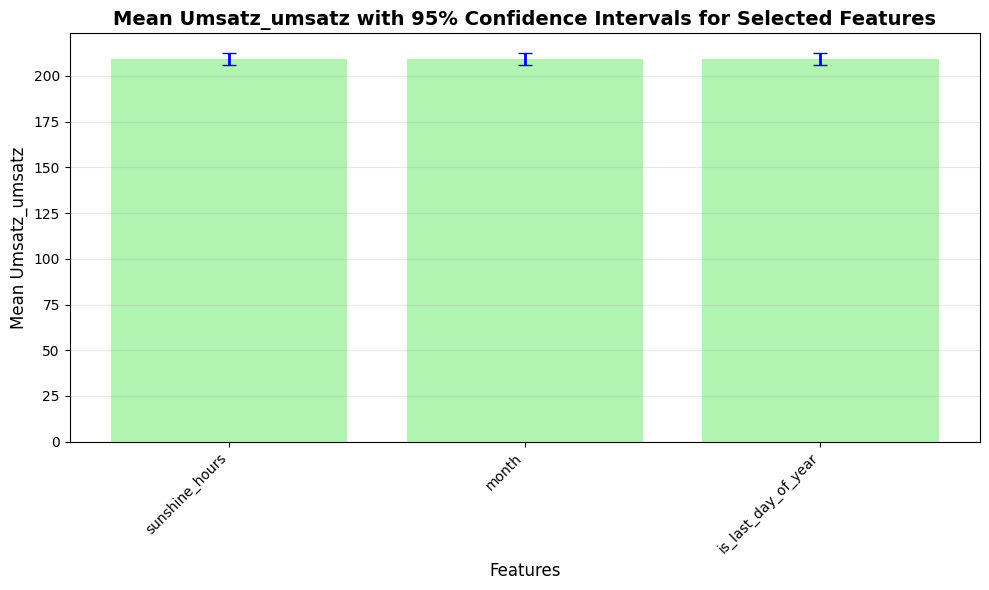

In [26]:
# generate bar plot for mean and 95% confidence interval for sunshine_hours, month, last_day_of_year against Umsatz_umsatz
import matplotlib.pyplot as plt
import numpy as np

features_to_plot = ['sunshine_hours', 'month', 'is_last_day_of_year']
means = []
ci_lower = []
ci_upper = []
labels = []

for col in features_to_plot:
    # Group by the feature and calculate mean Umsatz_umsatz for each group
    if col in ['month', 'is_last_day_of_year']:
        # For categorical/discrete variables, calculate mean Umsatz per category
        grouped_data = df_train_clean_numeric.groupby(col)['Umsatz_umsatz'].apply(list)
        
        # Calculate weighted average across all groups
        overall_means = []
        for group_data in grouped_data:
            if len(group_data) > 0:
                overall_means.extend(group_data)
        
        if len(overall_means) > 0:
            mean = np.mean(overall_means)
            std_err = stats.sem(overall_means)
            ci = stats.t.interval(0.95, len(overall_means)-1, loc=mean, scale=std_err)
            
            means.append(mean)
            ci_lower.append(mean - ci[0])
            ci_upper.append(ci[1] - mean)
            labels.append(col)
            print(f"{col}: Mean Umsatz = {mean:.4f}, 95% CI = [{ci[0]:.4f}, {ci[1]:.4f}]")
    else:
        # For continuous variables, calculate correlation-weighted mean
        data = df_train_clean_numeric[['Umsatz_umsatz', col]].dropna()
        if len(data) > 0:
            mean = data['Umsatz_umsatz'].mean()
            std_err = stats.sem(data['Umsatz_umsatz'])
            ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
            
            means.append(mean)
            ci_lower.append(mean - ci[0])
            ci_upper.append(ci[1] - mean)
            labels.append(col)
            print(f"{col}: Mean Umsatz = {mean:.4f}, 95% CI = [{ci[0]:.4f}, {ci[1]:.4f}]")

# Create bar chart with error bars
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(labels))

ax.bar(x_pos, means, yerr=[ci_lower, ci_upper], 
       capsize=5, alpha=0.7, color='lightgreen', 
       error_kw={'elinewidth': 2, 'ecolor': 'blue'})

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Mean Umsatz_umsatz', fontsize=12)
ax.set_title('Mean Umsatz_umsatz with 95% Confidence Intervals for Selected Features', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [27]:
import numpy as np
from scipy.stats import norm

# For binary variable
n = len(df_train_clean_numeric)
p = df_train_clean_numeric['is_last_day_of_year'].mean()
se = np.sqrt(p * (1 - p) / n)
z = norm.ppf(0.975)  # 95% CI
ci_lower = p - z * se
ci_upper = p + z * se
print(f"Proportion: {p:.4f}, 95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# For each month as a category
month_counts = df_train_clean_numeric['month'].value_counts().sort_index()
for month, count in month_counts.items():
    p = count / n
    se = np.sqrt(p * (1 - p) / n)
    ci_lower = p - z * se
    ci_upper = p + z * se
    print(f"Month {month:2d}: Proportion = {p:.4f}, 95% CI = [{ci_lower:.4f}, {ci_upper:.4f}]")

Proportion: 0.0024, 95% CI: [0.0013, 0.0035]
Month  1: Proportion = 0.0809, 95% CI = [0.0748, 0.0871]
Month  2: Proportion = 0.0755, 95% CI = [0.0695, 0.0814]
Month  3: Proportion = 0.0813, 95% CI = [0.0751, 0.0875]
Month  4: Proportion = 0.0776, 95% CI = [0.0715, 0.0837]
Month  5: Proportion = 0.0789, 95% CI = [0.0728, 0.0850]
Month  6: Proportion = 0.0795, 95% CI = [0.0733, 0.0856]
Month  7: Proportion = 0.1000, 95% CI = [0.0932, 0.1068]
Month  8: Proportion = 0.0803, 95% CI = [0.0741, 0.0864]
Month  9: Proportion = 0.0797, 95% CI = [0.0736, 0.0859]
Month 10: Proportion = 0.0843, 95% CI = [0.0780, 0.0906]
Month 11: Proportion = 0.0943, 95% CI = [0.0877, 0.1009]
Month 12: Proportion = 0.0876, 95% CI = [0.0812, 0.0940]


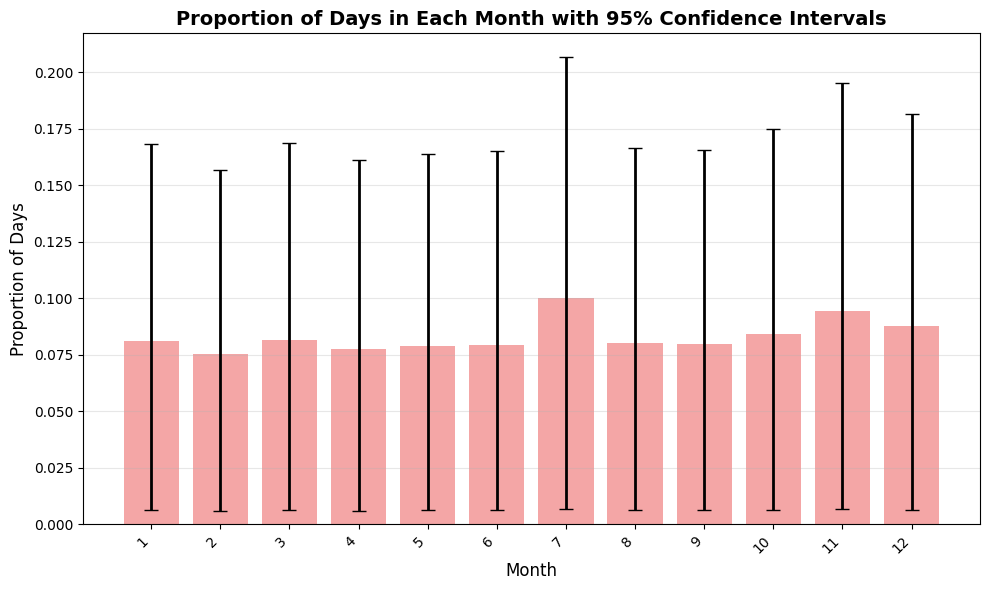

In [28]:
# plot above proportions with error bars
import matplotlib.pyplot as plt
months = month_counts.index
proportions = month_counts / n
se = np.sqrt(proportions * (1 - proportions) / n)
z = norm.ppf(0.975)  # 95% CI
ci_lower = proportions - z * se
ci_upper = proportions + z * se
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(months, proportions, yerr=[ci_lower, ci_upper], capsize=5, alpha=0.7, color='lightcoral', error_kw={'elinewidth': 2, 'ecolor': 'black'})
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Proportion of Days', fontsize=12)
ax.set_title('Proportion of Days in Each Month with 95% Confidence Intervals', fontsize=14, fontweight='bold')
ax.set_xticks(months)
ax.set_xticklabels(months, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()